In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [46]:
cv = pd.read_csv('HIST_PAINEL_COVIDBR_03abr2021.csv', sep = ';')

In [47]:
cv.head()

#Comentar sobre os valores nulos. Eles podem ou não dar informação, falar sobre tipo de nulos, como zeros,
#ou negativos, valores estranhos


,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN


In [48]:
cv.info(null_counts = True)

#Data está no formato errado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096757 entries, 0 to 2096756
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   regiao                  2096757 non-null  object 
 1   estado                  2096351 non-null  object 
 2   municipio               2077610 non-null  object 
 3   coduf                   2096757 non-null  int64  
 4   codmun                  2085443 non-null  float64
 5   codRegiaoSaude          2077610 non-null  float64
 6   nomeRegiaoSaude         2077610 non-null  object 
 7   data                    2096757 non-null  object 
 8   semanaEpi               2096757 non-null  int64  
 9   populacaoTCU2019        2088924 non-null  float64
 10  casosAcumulado          2096757 non-null  int64  
 11  casosNovos              2096757 non-null  int64  
 12  obitosAcumulado         2096757 non-null  int64  
 13  obitosNovos             2096757 non-null  int64  
 14  Re

In [49]:
cv.describe(include = 'all').T

#Existem valores negativos em casos novos e obitos novos

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
regiao,2096757,6,Nordeste,676155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
estado,2096351,27,MG,318946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
municipio,2077610,5297,São Domingos,1865,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coduf,2.09676e+06,NaN,NaN,NaN,32.3598,9.87628,11,25,31,41,76
codmun,2.08544e+06,NaN,NaN,NaN,325258,98535,110000,251200,314610,411915,530010
codRegiaoSaude,2.07761e+06,NaN,NaN,NaN,32403.1,9836.34,11001,25010,31059,41015,53001
nomeRegiaoSaude,2077610,440,CENTRAL,21634,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data,2096757,404,2021-01-13,5620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
semanaEpi,2.09676e+06,NaN,NaN,NaN,26.9183,15.2905,1,14,27,40,53
populacaoTCU2019,2.08892e+06,NaN,NaN,NaN,119011,3.06038e+06,781,5474,11708,25768,2.10147e+08


## Olhando para os dados

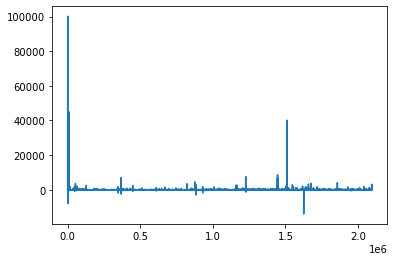

In [50]:
cv.casosNovos.plot()

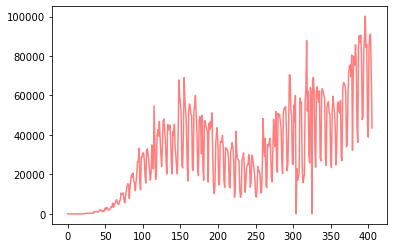

In [51]:
cv[cv.estado.isna()].casosNovos.plot(c = 'red', alpha = 0.5)

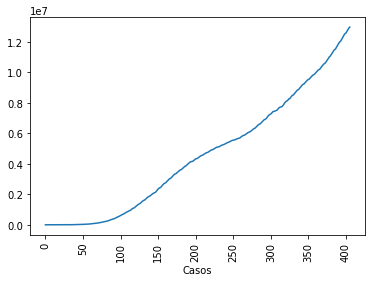

In [52]:
fig, ax = plt.subplots()
cv[cv.estado.isna()].casosAcumulado.plot()
ax.set_xlabel('Casos')
plt.xticks(rotation=90)
plt.show()

In [53]:
cv.sort_values(by = 'obitosNovos', ascending = True) #ordenar tabela pelo numero de obitos novos

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
852934,Sudeste,MG,NaN,31,310000.0,NaN,NaN,2020-08-06,32,NaN,511,1,40,-292,NaN,NaN,NaN
1965935,Centro-Oeste,MT,Curvelândia,51,510343.0,51011.0,OESTE MATOGROSSENSE,2020-07-06,28,5219.0,21,-1,1,-238,NaN,NaN,0.0
1965561,Centro-Oeste,MT,Cuiabá,51,510340.0,51002.0,BAIXADA CUIABANA,2020-07-05,28,612547.0,4789,38,2,-221,NaN,NaN,1.0
1218987,Sudeste,RJ,Niterói,33,330330.0,33006.0,METROPOLITANA II,2020-12-24,52,513584.0,22420,179,675,-111,NaN,NaN,1.0
2235,Norte,PA,NaN,15,NaN,NaN,NaN,2020-09-25,39,8602865.0,225542,1240,6427,-75,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-03-27,12,210147125.0,12490362,85948,310550,3438,10879627.0,1300185.0,NaN
397,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-03-26,12,210147125.0,12404414,84245,307112,3650,10824095.0,1273207.0,NaN
403,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-04-01,13,210147125.0,12839844,91097,325284,3769,11239099.0,1275461.0,NaN
401,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-03-30,13,210147125.0,12658109,84494,317646,3780,11074483.0,1265980.0,NaN


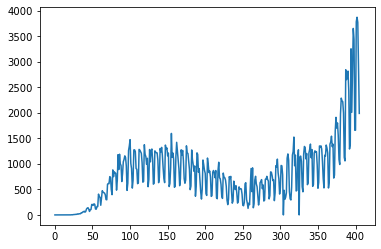

In [54]:
cv[cv.regiao == 'Brasil'].obitosNovos.plot()

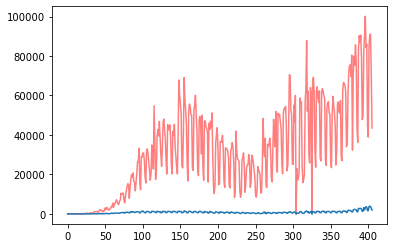

In [55]:
fig, ax = plt.subplots()
cv[cv.regiao == 'Brasil'].casosNovos.plot(c = 'red', alpha = 0.5)
cv[cv.regiao == 'Brasil'].obitosNovos.plot()

plt.show()

In [56]:
import datetime

In [57]:
print('Hora atual {}'.format(datetime.datetime.now()))

Hora atual 2021-04-04 20:12:13.550008


In [58]:
cv['data1'] = pd.to_datetime(pd.Series(cv.data)) #adicionar coluna com a formato de data certa

In [59]:
cv['data1'].dt

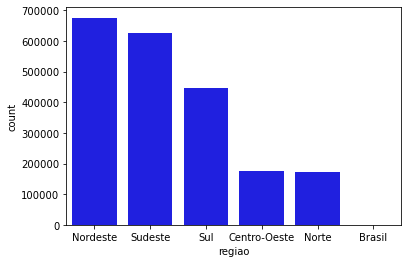

In [60]:
sns.countplot(x = 'regiao', 
              data=cv,
              order = cv.regiao.value_counts().index, color = 'b')

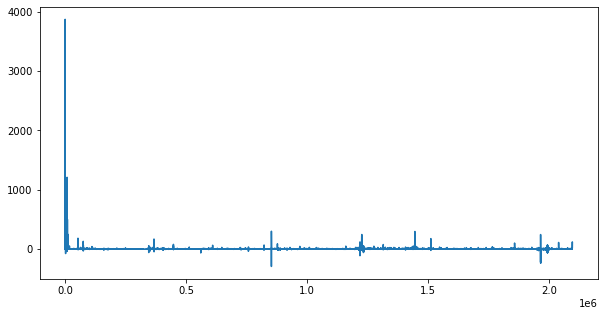

In [61]:
fig = plt.subplots(figsize = (10,5))

cv.obitosNovos.plot()

## MISSING VALUES

In [69]:
cv.isna().sum()

regiao                          0
estado                        406
municipio                   19147
coduf                           0
codmun                      11314
codRegiaoSaude              19147
nomeRegiaoSaude             19147
data                            0
semanaEpi                       0
populacaoTCU2019             7833
casosAcumulado                  0
casosNovos                      0
obitosAcumulado                 0
obitosNovos                     0
Recuperadosnovos          2096406
emAcompanhamentoNovos     2096406
interior/metropolitana      19147
data1                           0
dtype: int64

In [62]:
cv_na = cv.isna().sum() / len(cv) * 100 #transformando a quantidade de nulos em porcentagem

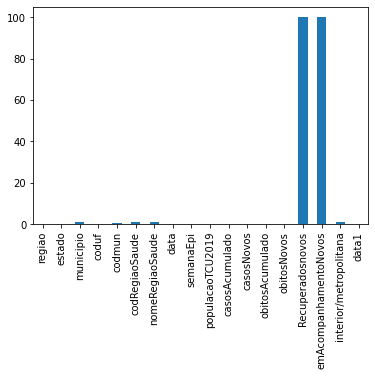

In [64]:
cv_na.plot(kind='bar') #ter cuidado nas variáveis com muito missing

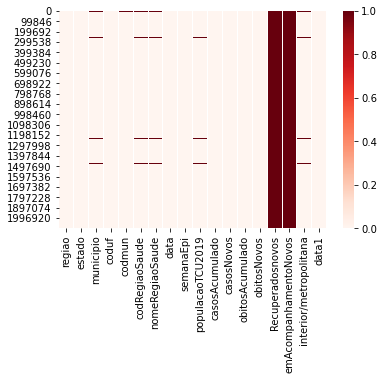

In [70]:
sns.heatmap(cv.isnull(), cmap = 'Reds') # comentar sobre esse tipo de visualização
# porque quando faz um train_test_split

In [65]:
cv[cv['Recuperadosnovos'].notnull()]

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana,data1
54,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-04-19,17,210147125.0,38654,2055,2462,115,22130.0,14062.0,NaN,2020-04-19
55,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-04-20,17,210147125.0,40581,1927,2575,113,22991.0,15015.0,NaN,2020-04-20
56,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-04-21,17,210147125.0,43079,2498,2741,166,24325.0,16013.0,NaN,2020-04-21
57,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-04-22,17,210147125.0,45757,2678,2906,165,25318.0,17533.0,NaN,2020-04-22
58,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-04-23,17,210147125.0,49492,3735,3313,407,26573.0,19606.0,NaN,2020-04-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-03-30,13,210147125.0,12658109,84494,317646,3780,11074483.0,1265980.0,NaN,2021-03-30
402,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-03-31,13,210147125.0,12748747,90638,321515,3869,11169937.0,1257295.0,NaN,2021-03-31
403,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-04-01,13,210147125.0,12839844,91097,325284,3769,11239099.0,1275461.0,NaN,2021-04-01
404,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-04-02,13,210147125.0,12910082,70238,328206,2922,11276628.0,1305248.0,NaN,2021-04-02


## Feature Engineering

In [72]:
cv['Casos_ativos'] = cv['casosAcumulado'] - cv['Recuperadosnovos'] - cv['obitosAcumulado'] #feature engineering, criar vars

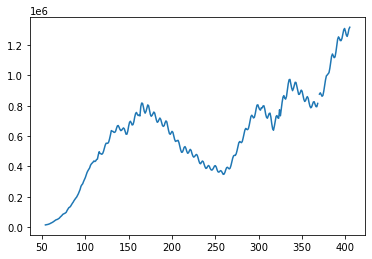

In [73]:
cv.Casos_ativos.plot()

plt.show()

In [74]:
cv_bra = cv[cv.regiao == 'Brasil']

In [81]:
cv_bra.drop(['coduf', 'codmun','codRegiaoSaude','populacaoTCU2019'], axis=1, inplace = True)

In [84]:
cv_bra.drop('interior/metropolitana', axis = 1, inplace = True)

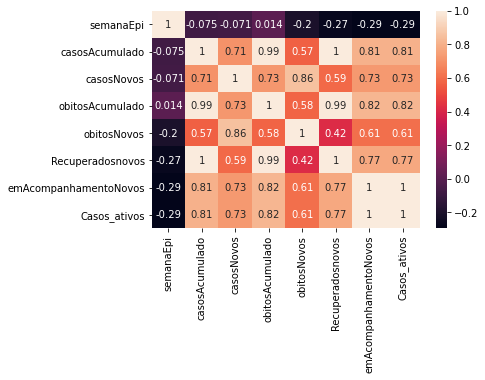

In [87]:
sns.heatmap(cv_bra.corr(), annot = True) #coeficiente de correlação de Pearson

In [97]:
cv_reg = cv[cv.regiao != 'Brasil']

In [98]:
cv_reg.isna().sum()

regiao                          0
estado                          0
municipio                   18741
coduf                           0
codmun                      10908
codRegiaoSaude              18741
nomeRegiaoSaude             18741
data                            0
semanaEpi                       0
populacaoTCU2019             7833
casosAcumulado                  0
casosNovos                      0
obitosAcumulado                 0
obitosNovos                     0
Recuperadosnovos          2096351
emAcompanhamentoNovos     2096351
interior/metropolitana      18741
data1                           0
Casos_ativos              2096351
dtype: int64

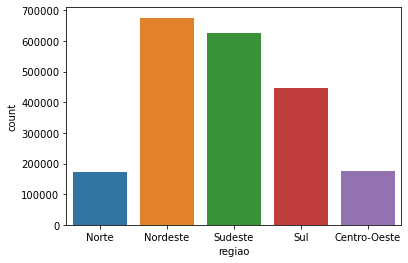

In [100]:
sns.countplot(x = 'regiao', data = cv_reg)

In [101]:
cv_reg

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana,data1,Casos_ativos
406,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-25,9,1777225.0,0,0,0,0,NaN,NaN,NaN,2020-02-25,NaN
407,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-26,9,1777225.0,0,0,0,0,NaN,NaN,NaN,2020-02-26,NaN
408,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-27,9,1777225.0,0,0,0,0,NaN,NaN,NaN,2020-02-27,NaN
409,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-28,9,1777225.0,0,0,0,0,NaN,NaN,NaN,2020-02-28,NaN
410,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-29,9,1777225.0,0,0,0,0,NaN,NaN,NaN,2020-02-29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096752,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-03-30,13,3015268.0,343111,1353,5912,94,NaN,NaN,1.0,2021-03-30,NaN
2096753,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-03-31,13,3015268.0,344364,1253,6029,117,NaN,NaN,1.0,2021-03-31,NaN
2096754,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-04-01,13,3015268.0,345682,1318,6150,121,NaN,NaN,1.0,2021-04-01,NaN
2096755,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-04-02,13,3015268.0,346873,1191,6207,57,NaN,NaN,1.0,2021-04-02,NaN


In [120]:
cv_est = cv.groupby('estado')['casosAcumulado','obitosAcumulado','casosNovos'].max().reset_index()

In [121]:
cv_est

,estado,casosAcumulado,obitosAcumulado,casosNovos
0,AC,71062,1284,863
1,AL,155810,3620,1487
2,AM,351864,12061,5009
3,AP,98604,1323,2842
4,BA,813794,15660,8822
5,CE,548635,14334,12823
6,DF,348687,6235,3171
7,ES,387778,7639,3826
8,GO,488558,11822,5257
9,MA,244563,6191,2805
